In [166]:
# All the libraries you'll need( probably)
import pandas as pd
import numpy as np 
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from scipy.stats import skew

In [167]:
df = pd.read_csv(r"reduced_col.csv",index_col=[0])

In [168]:
df.head()

,gender,body.temperature,pulse,respiration,map,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,...,methemoglobin,chloride.ion,glucose.blood.gas,lactate,carboxyhemoglobin,oxygen.saturation,partial.oxygen.pressure,anion.gap,free.calcium,ageCat
0,0.0,0.271429,0.333333,0.500000,0.428309,0.046006,1.0,1.0,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
1,0.0,0.142857,0.363636,0.583333,0.569853,0.053564,1.0,1.0,0.000000,0.0,...,0.130435,0.750,0.085784,0.109756,0.132075,0.880000,0.187234,0.394444,0.44,0.533333
2,1.0,0.200000,0.353535,0.555556,0.514706,0.076992,1.0,0.5,0.333333,0.0,...,0.130435,0.625,0.125000,0.085366,0.000000,0.973333,0.365957,0.286111,0.44,0.800000
3,1.0,0.242857,0.651515,0.611111,0.540441,0.049828,1.0,0.5,0.666667,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
4,0.0,0.271429,0.505051,0.555556,0.413603,0.054523,1.0,0.5,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266667


In [169]:
df2 =pd.read_csv(r'C:\Users\Vinayak\minor_proj\collabRV\EDA\drug_dict_onehot.csv',index_col=[0])
df2.head()


,inpatient.number,Atorvastatin calcium tablet,Benazepril hydrochloride tablet,Deslanoside injection,Digoxin tablet,Dobutamine hydrochloride injection,Furosemide injection,Furosemide tablet,Hydrochlorothiazide tablet,Isoprenaline Hydrochloride injection,Isosorbide Mononitrate Sustained Release tablet,Meglumine Adenosine Cyclophosphate for injection,Milrinone injection,Nitroglycerin injection,Shenfu injection,Spironolactone tablet,Torasemide tablet,Valsartan Dispersible tablet,sulfotanshinone sodium injection
0,722128,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
1,723327,1,0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,0
2,723617,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,724385,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
4,725509,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,0


In [170]:
df2.drop(['inpatient.number'],axis=1,inplace=True)
df2.head()

,Atorvastatin calcium tablet,Benazepril hydrochloride tablet,Deslanoside injection,Digoxin tablet,Dobutamine hydrochloride injection,Furosemide injection,Furosemide tablet,Hydrochlorothiazide tablet,Isoprenaline Hydrochloride injection,Isosorbide Mononitrate Sustained Release tablet,Meglumine Adenosine Cyclophosphate for injection,Milrinone injection,Nitroglycerin injection,Shenfu injection,Spironolactone tablet,Torasemide tablet,Valsartan Dispersible tablet,sulfotanshinone sodium injection
0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
1,1,0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
4,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,0


In [171]:
df3=df2['Atorvastatin calcium tablet']
df3 = df3.to_frame()

In [172]:
df3.shape

(1996, 1)

In [173]:
count = (df2['Dobutamine hydrochloride injection'] == 0).sum()
print('Count of zeros in Column   : ', count)

Count of zeros in Column   :  1974


In [174]:
a=df.skew(axis = 0, skipna = True)

In [175]:
b=df.columns
b

Index(['gender', 'body.temperature', 'pulse', 'respiration', 'map', 'BMI',
       'type.of.heart.failure', 'NYHA.cardiac.function.classification',
       'Killip.grade', 'myocardial.infarction', 'congestive.heart.failure',
       'peripheral.vascular.disease', 'cerebrovascular.disease', 'dementia',
       'Chronic.obstructive.pulmonary.disease', 'connective.tissue.disease',
       'peptic.ulcer.disease', 'diabetes',
       'moderate.to.severe.chronic.kidney.disease', 'hemiplegia',
       'malignant.lymphoma', 'solid.tumor', 'liver.disease', 'AIDS',
       'CCI.score', 'type.II.respiratory.failure', 'eye.opening',
       'respiratory.support.', 'oxygen.inhalation', 'fio2',
       'acute.renal.failure', 'left.ventricular.end.diastolic.diameter.LV',
       'mitral.valve.EMS', 'tricuspid.valve.return.velocity',
       'outcome.during.hospitalization',
       'return.to.emergency.department.within.6.months',
       'creatinine.enzymatic.method', 'urea', 'uric.acid',
       'glomerular.filtr

In [176]:
for i in range(len(a)):
    if(a[i]<0.5 and a[i]>-0.5):
        df[b[i]]=df[b[i]].fillna(df[b[i]].mean())
    else:
        df[b[i]]=df[b[i]].fillna(df[b[i]].median())
        

In [177]:
df.head()

,gender,body.temperature,pulse,respiration,map,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,...,methemoglobin,chloride.ion,glucose.blood.gas,lactate,carboxyhemoglobin,oxygen.saturation,partial.oxygen.pressure,anion.gap,free.calcium,ageCat
0,0.0,0.271429,0.333333,0.500000,0.428309,0.046006,1.0,1.0,0.000000,0.0,...,0.086957,0.666667,0.159314,0.073171,0.075472,0.973333,0.346809,0.416667,0.44144,0.666667
1,0.0,0.142857,0.363636,0.583333,0.569853,0.053564,1.0,1.0,0.000000,0.0,...,0.130435,0.750000,0.085784,0.109756,0.132075,0.880000,0.187234,0.394444,0.44000,0.533333
2,1.0,0.200000,0.353535,0.555556,0.514706,0.076992,1.0,0.5,0.333333,0.0,...,0.130435,0.625000,0.125000,0.085366,0.000000,0.973333,0.365957,0.286111,0.44000,0.800000
3,1.0,0.242857,0.651515,0.611111,0.540441,0.049828,1.0,0.5,0.666667,0.0,...,0.086957,0.666667,0.159314,0.073171,0.075472,0.973333,0.346809,0.416667,0.44144,0.666667
4,0.0,0.271429,0.505051,0.555556,0.413603,0.054523,1.0,0.5,0.000000,0.0,...,0.086957,0.666667,0.159314,0.073171,0.075472,0.973333,0.346809,0.416667,0.44144,0.266667


In [178]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 0.95)
# pca.fit(df)
# reduced = pca.transform(df)
# reduced.shape

In [179]:
X=df
y=df3

In [180]:
from collections import Counter


In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")


Training target statistics: Counter({'Atorvastatin calcium tablet': 1})
Testing target statistics: Counter({'Atorvastatin calcium tablet': 1})


In [182]:
logreg = LogisticRegression(verbose=1)
logreg.fit(X_train, y_train)

E:\anoconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
E:\anoconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [183]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.58


In [186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from numpy import argmax
import numpy as np
def build_and_test(X_tr, X_te, y_tr, y_te, class_weight=None, threshold=False):
    
    # Build and Plot PCA
    pca = PCA(n_components=2)
    pca.fit(X_tr.to_numpy())
    X_pca = pca.transform(X_tr.to_numpy())
    plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()
    
    # Build and fit the model
    if class_weight:
        model = DecisionTreeClassifier(class_weight=class_weight)
    else:
        model = DecisionTreeClassifier()
    model.fit(X_tr, y_tr)
    
    # Test the model
    y_pred = model.predict(X_te)
    print('Precision score %s' % precision_score(y_te, y_pred))
    print('Recall score %s' % recall_score(y_te, y_pred))
    print('F1-score score %s' % f1_score(y_te, y_pred))
    print('Accuracy score %s' % accuracy_score(y_te, y_pred))
    
    y_score = model.predict_proba(X_te)
    fpr0, tpr0, thresholds = roc_curve(y_te, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    
    # Calculate the best threshold
    best_threshold = None
    if threshold:
        J = tpr0 - fpr0
        ix = argmax(J) # take the value which maximizes the J variable
        best_threshold = thresholds[ix]
        # adjust score according to threshold.
        y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])
        
    
    # Plot metrics 
    plot_roc(y_te, y_score)
    plt.show()
    
    plot_precision_recall(y_te, y_score)
    plt.show()
    
    plot_cumulative_gain(y_te, y_score)
    plt.show()
    
    plot_lift_curve(y_te, y_score)
    plt.show()
    
    # Print a classification report
    print(classification_report(y_te,y_pred))
    return roc_auc0,fpr0,tpr0, best_threshold


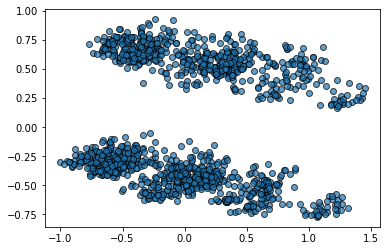

Precision score 0.3771186440677966
Recall score 0.363265306122449
F1-score score 0.3700623700623701
Accuracy score 0.4941569282136895


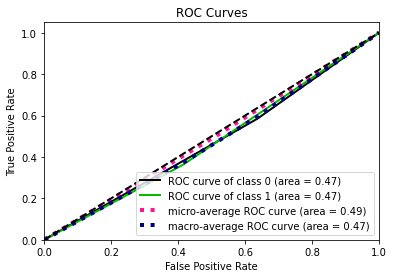

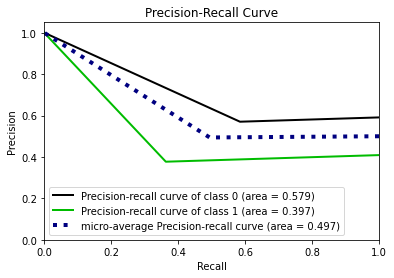

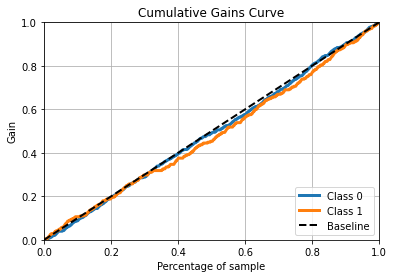

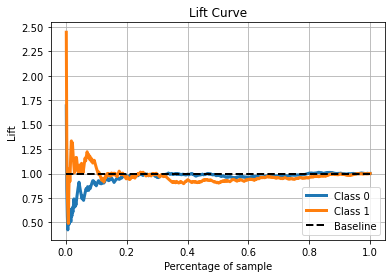

              precision    recall  f1-score   support

           0       0.57      0.58      0.58       354
           1       0.38      0.36      0.37       245

    accuracy                           0.49       599
   macro avg       0.47      0.47      0.47       599
weighted avg       0.49      0.49      0.49       599



In [187]:
roc_auc_imb,fpr_imb,tpr_imb, _ = build_and_test(X_train, X_test, y_train, y_test)


In [189]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")


Training target statistics: Counter({'Atorvastatin calcium tablet': 1})
Testing target statistics: Counter({'Atorvastatin calcium tablet': 1})


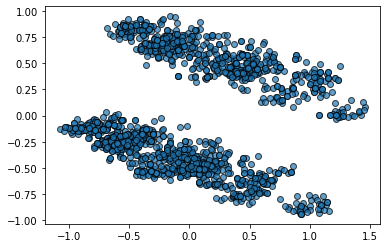

Precision score 0.45081967213114754
Recall score 0.4489795918367347
F1-score score 0.4498977505112475
Accuracy score 0.5509181969949917


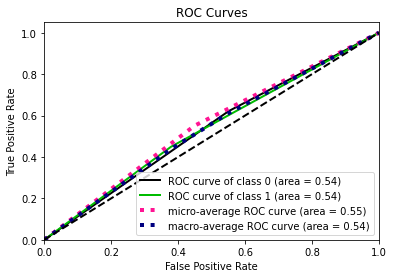

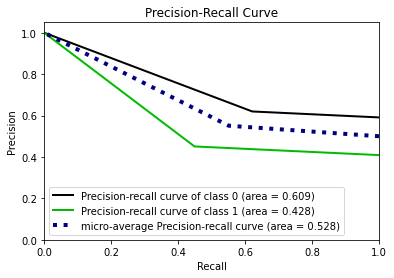

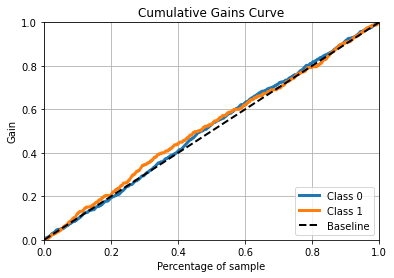

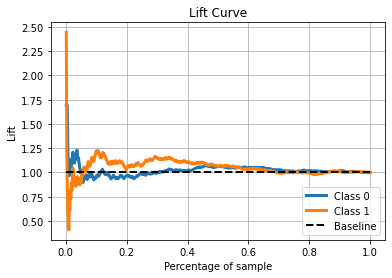

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       354
           1       0.45      0.45      0.45       245

    accuracy                           0.55       599
   macro avg       0.54      0.54      0.54       599
weighted avg       0.55      0.55      0.55       599



In [190]:
roc_auc_ros,fpr_ros,tpr_ros, _ = build_and_test(X_res, X_test, y_res, y_test)


In [191]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(k_neighbors=2)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")


Training target statistics: Counter({'Atorvastatin calcium tablet': 1})
Testing target statistics: Counter({'Atorvastatin calcium tablet': 1})
